# Análisis de Series Temporales del Índice RVI en Caña de Azúcar

In [5]:
from google.colab import drive
drive.mount('/content/ee-chart.csv')

Drive already mounted at /content/ee-chart.csv; to attempt to forcibly remount, call drive.mount("/content/ee-chart.csv", force_remount=True).


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import periodogram, find_peaks
from numpy.fft import fft
import os

# Definir rutas de archivo
file_path = "/content/drive/MyDrive/RVI_Analysis/ee-chart.csv"
output_dir = "/content/drive/MyDrive/RVI_Analysis"
os.makedirs(output_dir, exist_ok=True)  # Crear el directorio si no existe

# Cargar los datos
data = pd.read_csv(file_path)

# Convertir la columna de fechas y ordenar
data['system:time_start'] = pd.to_datetime(data['system:time_start'])
data.sort_values('system:time_start', inplace=True)
data.set_index('system:time_start', inplace=True)

# Calcular la frecuencia de muestreo
time_deltas = data.index.to_series().diff().dt.days.median()
fs = 1 / time_deltas  # Frecuencia de muestreo (ciclos por día)


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


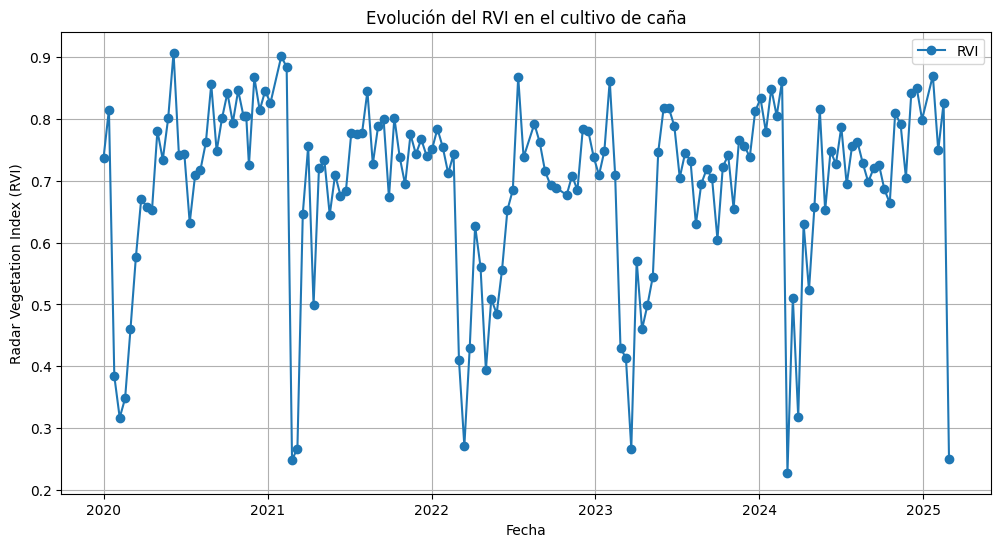

In [12]:

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RVI'], marker='o', linestyle='-', label='RVI')
plt.xlabel('Fecha')
plt.ylabel('Radar Vegetation Index (RVI)')
plt.title('Evolución del RVI en el cultivo de caña')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(output_dir, "serie_temporal_RVI.png"), dpi=300)
plt.show()


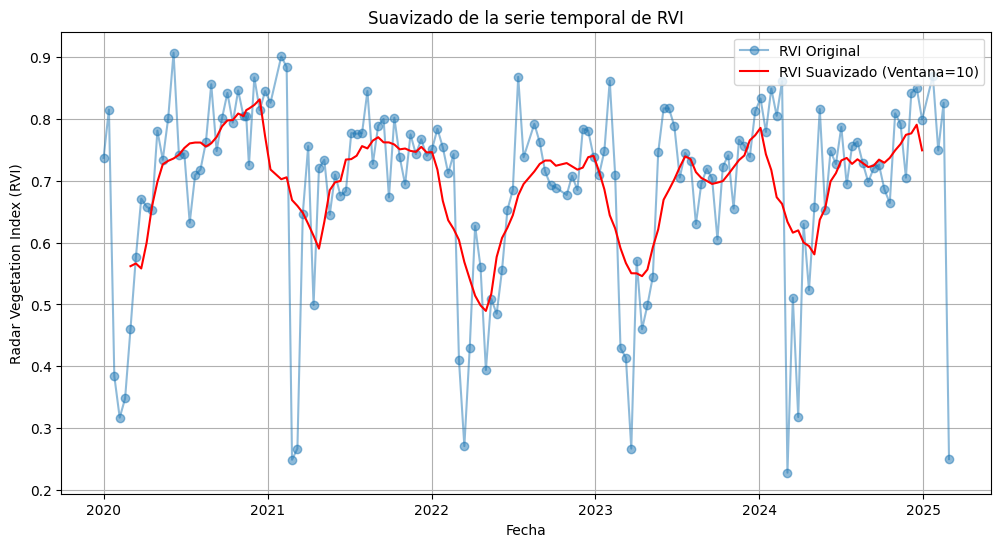

In [13]:

data['RVI_smooth'] = data['RVI'].rolling(window=10, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RVI'], marker='o', linestyle='-', alpha=0.5, label='RVI Original')
plt.plot(data.index, data['RVI_smooth'], linestyle='-', color='red', label='RVI Suavizado (Ventana=10)')
plt.xlabel('Fecha')
plt.ylabel('Radar Vegetation Index (RVI)')
plt.title('Suavizado de la serie temporal de RVI')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(output_dir, "suavizado_RVI.png"), dpi=300)
plt.show()


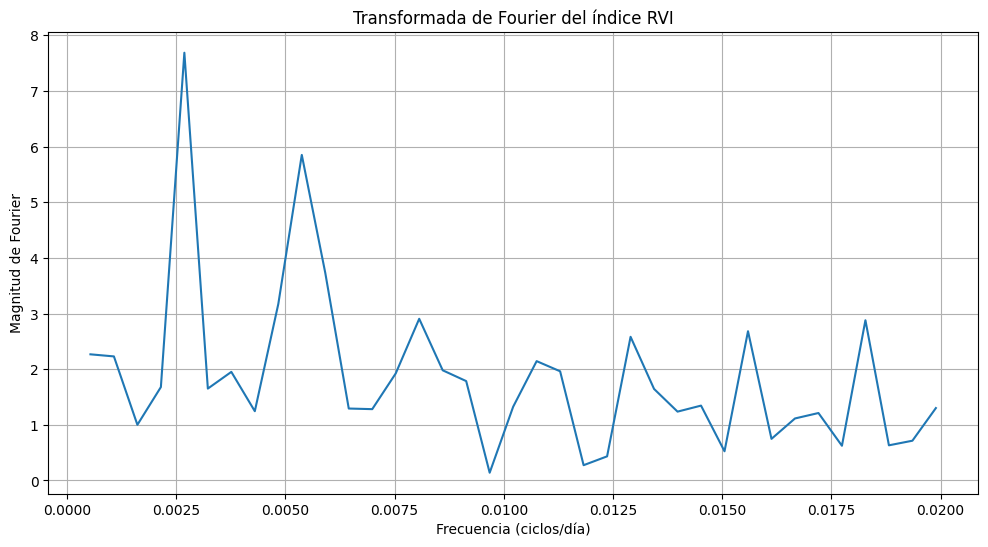

In [19]:

rvi_values = data['RVI'].values
fft_values = fft(rvi_values)
frequencies = np.fft.fftfreq(len(rvi_values), d=time_deltas)

valid_range = (frequencies > 0.0001) & (frequencies < 0.02)
filtered_frequencies = frequencies[valid_range]
filtered_fft_values = np.abs(fft_values[valid_range])

plt.figure(figsize=(12, 6))
plt.plot(filtered_frequencies, filtered_fft_values)
plt.xlabel('Frecuencia (ciclos/día)')
plt.ylabel('Magnitud de Fourier')
plt.title('Transformada de Fourier del índice RVI')
plt.grid(True)
plt.savefig(os.path.join(output_dir, "transformada_fourier_RVI.png"), dpi=300)
plt.show()


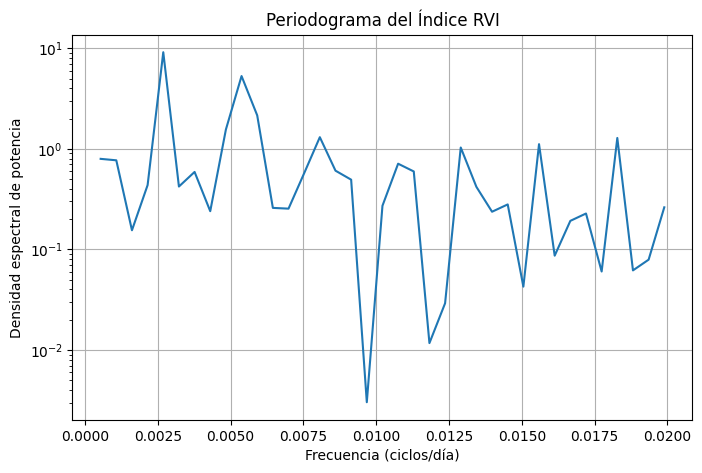

In [20]:

import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Calcular el periodograma
freqs, power = periodogram(data['RVI'], fs=fs)

# Filtrar las frecuencias dentro del rango deseado
valid_period_range = (freqs > 0.0001) & (freqs < 0.02)
filtered_freqs = freqs[valid_period_range]
filtered_power = power[valid_period_range]

# Generar el gráfico corregido
plt.figure(figsize=(8,5))
plt.plot(filtered_freqs, filtered_power)  # ← Se usa 'filtered_freqs' y 'filtered_power'
plt.yscale('log')
plt.xlabel('Frecuencia (ciclos/día)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma del Índice RVI')
plt.grid()

# Mostrar el gráfico sin información adicional no deseada
plt.show()



